In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

In [2]:
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
dataset = randn(25)
dataset

array([ 2.06798387,  1.55138943,  0.46648831, -0.96270953,  0.13811554,
        0.57821182, -0.94827998, -1.81290014,  2.40068093,  0.15465117,
        0.0486241 ,  0.48130068,  0.46610701, -0.67046975,  1.16453646,
       -0.0657151 , -1.21787107,  0.71608922, -0.90758206,  0.43645927,
        2.109246  , -0.66473476,  1.18434824, -0.2118205 ,  0.59297646])

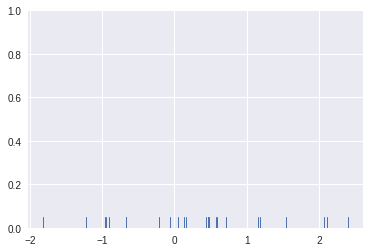

In [12]:
sns.rugplot(dataset)

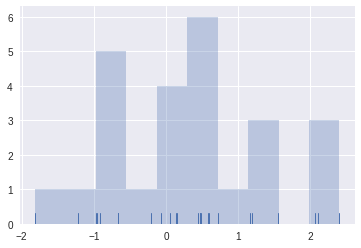

In [13]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

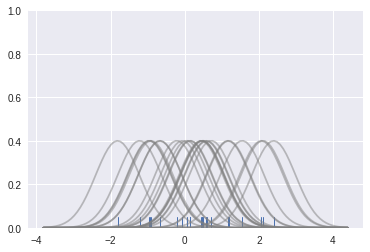

In [14]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*0.4
    
    plt.plot(x_axis, kernel, color='grey',alpha=0.5)
    
plt.ylim(0,1)

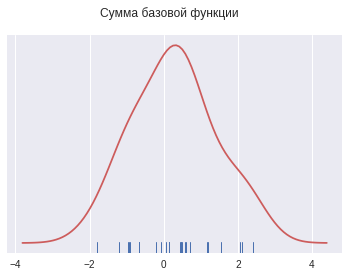

In [15]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Сумма базовой функции")

/home/andrey/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


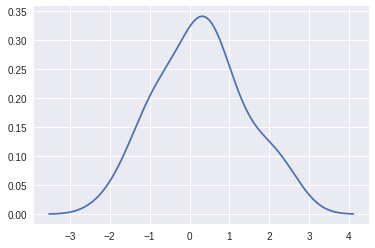

In [16]:
sns.kdeplot(dataset)

/home/andrey/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


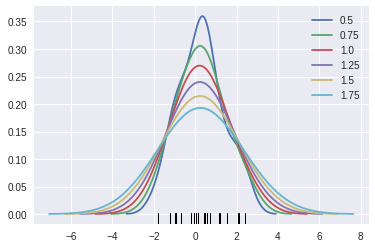

In [17]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

/home/andrey/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/andrey/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


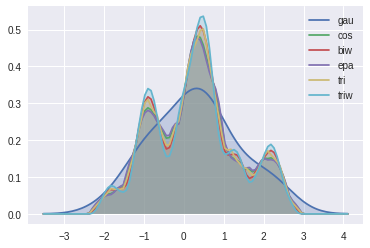

In [19]:
kernel_options = ['gau','cos','biw','epa','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

/home/andrey/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


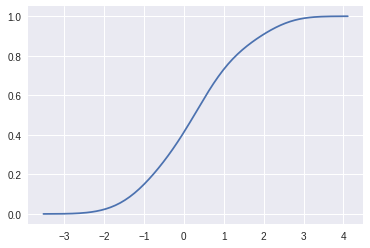

In [20]:
sns.kdeplot(dataset,cumulative=True)

In [21]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

In [22]:
dataset2

array([[  4.06220806e-03,  -4.13865904e+00],
       [ -4.04911651e-01,  -8.35413830e+00],
       [  5.01359471e-01,   1.87568474e+01],
       ..., 
       [  1.08169475e+00,  -1.95382387e+01],
       [  6.88053233e-01,   2.73835604e+01],
       [  1.44039391e-01,  -7.74791942e-01]])

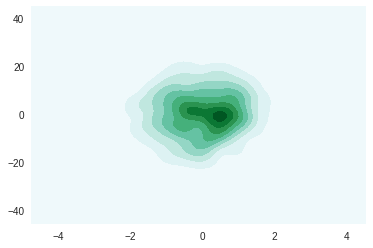

In [24]:
df = DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(df,shade=True)

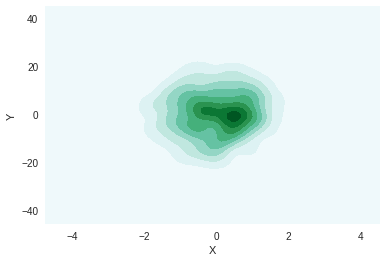

In [26]:
sns.kdeplot(df.X,df.Y,shade=True)

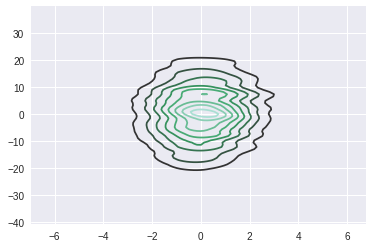

In [27]:
sns.kdeplot(df,bw=1)

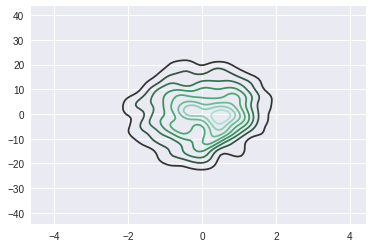

In [28]:
sns.kdeplot(df,bw='silverman')

/home/andrey/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


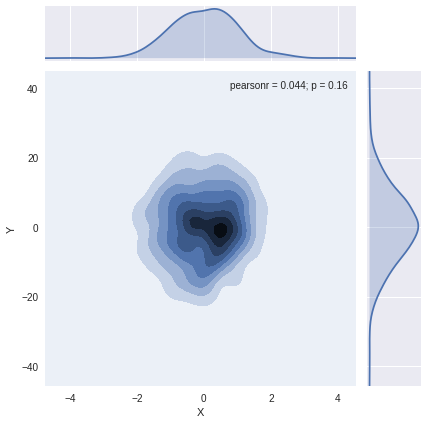

In [30]:
sns.jointplot('X','Y',df,kind='kde')